# Backtracking and Memoization
# Lecture 12

### Recursion

Recursion is a type of reducing a problem to a _smaller_ instance of itself.

Four types of recursion in algorithms:
1. *Tail recursion* Problem reduced to a _single_ recursive call. E.g., binary search. Easy to convert to iterative algorithm.
2. *Divide and conquer* Reduce problem to multiple _independent_ subproblems. E.g, sort, median selection.
3. *Backtracking* Examine all possible recursive subproblems to pick the best one. Refinement of brute-force search.
4. *Dynamic programming* Build up solution from _overlapping_ subproblems and use _memoization_ to avoid recomputation.

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from numpy import array

In [2]:
G = nx.from_dict_of_lists({0: [2, 3, 4, 7],
 1: [7, 8],
 2: [0, 4, 7],
 3: [0, 4, 7, 9],
 4: [0, 2, 3, 6, 8],
 5: [6],
 6: [4, 5, 9],
 7: [0, 1, 2, 3],
 8: [1, 4, 9],
 9: [3, 6, 8]})

In [3]:
pos = {0: array([ 0.20610891, -0.30283659]),
 1: array([0.60880582, 0.19768167]),
 2: array([ 0.19410459, -0.50273964]),
 3: array([ 0.14609013, -0.01566634]),
 4: array([-0.09004436, -0.11026924]),
 5: array([-1.       ,  0.2259425]),
 6: array([-0.55219057,  0.13373286]),
 7: array([ 0.48115205, -0.20125115]),
 8: array([0.18317203, 0.29376107]),
 9: array([-0.17719861,  0.28164486])}

In [4]:
import itertools
def all_subsequences(sequence):
    """
    Generates all subsequences of a given sequence
    """
    for l in range(len(sequence)+1):
        # generates all subsequences of length l
        yield from itertools.combinations(sequence, l)

## Maximum Independent Set

Given a graph $G = (E,V)$, an _independent set_ is a subset of nodes $S \subset V$ such that there are no edges between nodes in $S$. I.e., if $u, v \in S$ then $(u, v) \notin E$

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


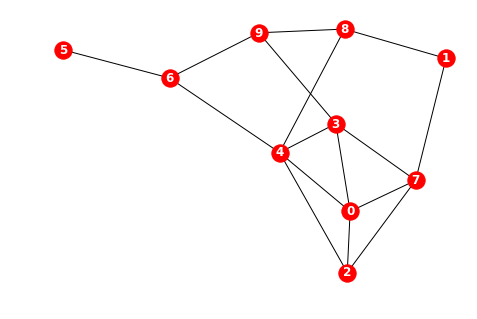

In [5]:
def draw_graph(G, pos, **kwargs):
    nx.draw(G, pos, with_labels=True, font_color='w', font_weight='bold', **kwargs)

draw_graph(G, pos)

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


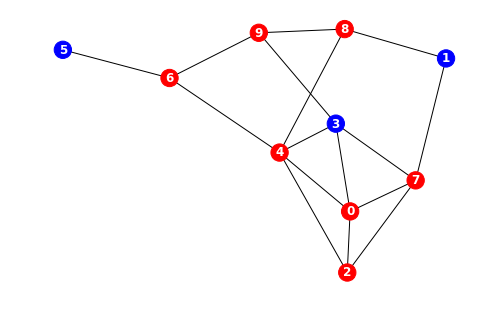

In [6]:
ind_set = {1, 3, 5}
def draw_subset(G, pos, S):
    colors = [i in S and "blue" or "red" for i in range(10)]
    nx.draw(G, pos, with_labels=True, font_color='w', font_weight="bold", 
            node_color=colors)

draw_subset(G, pos, ind_set)

In [7]:
def is_independent(G, S):
    # enumerate all pairs
    for x, y in itertools.combinations(S, 2):
        if (x,y) in G.edges:
            return False
    return True

In [8]:
is_independent(G, {5,9,1,0})

True

In [9]:
is_independent(G, {1, 2, 3, 4})

False

### Brute-force enumeration

In [10]:
def brute_force_mis(G):
    max_set = []
    for S in all_subsequences(G.nodes):
        if is_independent(G, S) and len(S) > len(max_set):
            max_set = S
    return max_set

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


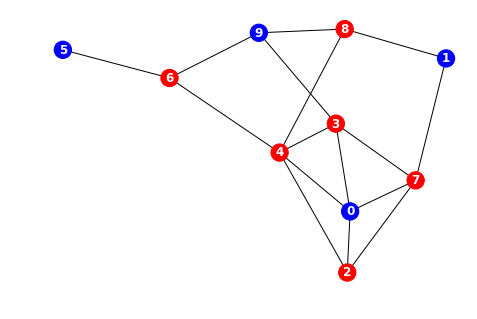

In [11]:
S = brute_force_mis(G)
draw_subset(G, pos, S)

### Time complexity of Brute force search?

Suppose we have $n$ nodes and $m$ edges

$2^n$ calls to `is_independent`

`is_independent` takes $O(m)$ time.

Total runtime $O(m2^n)$

### Recursive approach

Pick a node $n$ in $G$. Two cases:
- $n$ is not in a maximum independent set. Then MIS(G) = MIS($G - \{ n \}$)
- $n$ _is_ in a maximum independent set. Then MISZ(G) = 1 + MIS($G - \{ n \} - N(n)$), where $N(n)$ denotes all neighbors of $N$ in $G$

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


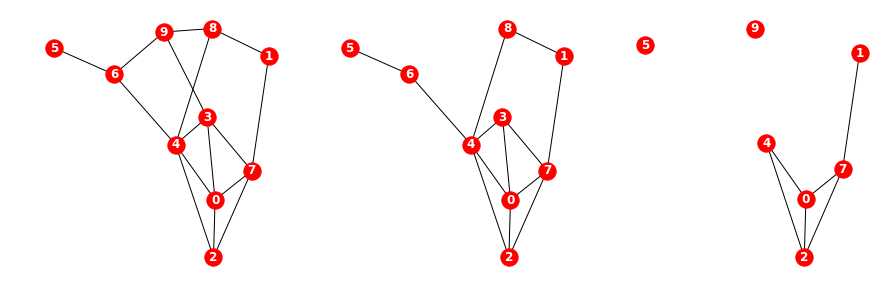

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(131)
draw_graph(G, pos)
plt.subplot(132)
G2 = G.copy()
G2.remove_node(9)
draw_graph(G2, pos)
plt.subplot(133)
G3 = G.copy()
G3.remove_nodes_from(G[9])
draw_graph(G3, pos)

In [13]:
num_calls = 0
def recursive_mis(G):
    global num_calls
    num_calls += 1
    if len(G) == 0:
        return []
    G1 = G.copy()
    # n is first node of G
    n = list(G.nodes)[0]
    G1.remove_node(n)
    mis_wo = recursive_mis(G1)
    G2 = G1.copy()
    # remove neighbors of n
    G2.remove_nodes_from(G[n])
    mis_with = recursive_mis(G2)
    mis_with.append(n)
    if len(mis_with) > len(mis_wo):
        return mis_with
    else: 
        return mis_wo

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


([9, 7, 5, 4], 153)

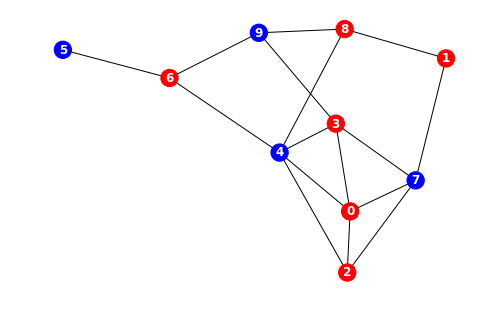

In [14]:
S = recursive_mis(G)
draw_subset(G, pos, S)
S, num_calls

Time complexity: $O(2^{n})$ where $n = |V|$ (number of nodes)

## Increasing Subsequence 

A _sequence_ is an ordered list $a_1, \ldots, a_n$.
The _length_ of a sequence is the number of elements in the list

$a_{i_1}, \ldots, a_{i_k}$ is a _subsequence_ of $a_1, \ldots, a_n$ if $1 \leq i_1 < i_2 \ldots < i_k \leq n$

A sequence is _increasing_ if $a_1 < a_2 \ldots < a_n$. 

Examples:
- Sequence: 6, 3, 5, 2, 7, 8, 1, 9
- Subsequence: 5, 2, 1
- Increasing _subsequence_: 2, 7, 9

In [15]:
def is_increasing(sequence):
    prev = None
    for cur in sequence:
        if prev is not None and cur <= prev:
            # not increasing
            return False
        prev = cur
    return True

In [16]:
is_increasing([6,3,5,2])

False

In [17]:
is_increasing([2,7,9])

True

### Longest Increasing Subsequence Problem

*Input*: A sequence of number $a_1, \ldots, a_n$

*Goal*: Find an increasing subsequence $a_{i_1}, \ldots, a_{i_k}$ of maximum length

Brute force search: try all subsequences, track the maximum.

In [20]:
# brute force search: check all subsequences
def brute_force_lis(sequence):
    max_is = [] # empty subsequence
    for sub in all_subsequences(sequence):
        if is_increasing(sub) and len(sub) > len(max_is):
            max_is = sub
    return max_is

In [21]:
brute_force_lis([6, 3, 5, 2, 7, 8, 1, 9])

(3, 5, 7, 8, 9)

What is the running time of `brute_force_lis`?

In [22]:
def traced(func):
    recursion_depth = 0
    def inner(*args):
        nonlocal recursion_depth
        print("{}{}({})".format("  " * recursion_depth, func.__name__, ', '.join(repr(x) for x in args)))
        recursion_depth += 1
        ret = func(*args)
        recursion_depth -= 1
        print("{}return {}".format("  " * recursion_depth, repr(ret)))
        return ret
    return inner


In [23]:
is_increasing=traced(is_increasing)
brute_force_lis([6, 3, 5, 2, 7, 8, 1, 9])

is_increasing(())
return True
is_increasing((6,))
return True
is_increasing((3,))
return True
is_increasing((5,))
return True
is_increasing((2,))
return True
is_increasing((7,))
return True
is_increasing((8,))
return True
is_increasing((1,))
return True
is_increasing((9,))
return True
is_increasing((6, 3))
return False
is_increasing((6, 5))
return False
is_increasing((6, 2))
return False
is_increasing((6, 7))
return True
is_increasing((6, 8))
return True
is_increasing((6, 1))
return False
is_increasing((6, 9))
return True
is_increasing((3, 5))
return True
is_increasing((3, 2))
return False
is_increasing((3, 7))
return True
is_increasing((3, 8))
return True
is_increasing((3, 1))
return False
is_increasing((3, 9))
return True
is_increasing((5, 2))
return False
is_increasing((5, 7))
return True
is_increasing((5, 8))
return True
is_increasing((5, 1))
return False
is_increasing((5, 9))
return True
is_increasing((2, 7))
return True
is_increasing((2, 8))
return True
is_increasing((2, 1))
retu

(3, 5, 7, 8, 9)

There are $2^n$ subsequences, so `brute_force_lis` makes $2^n$ calls to `is_increasing`, which is $O(n)$, so `brute_force_lis` takes $O(n 2^n)$ time

# Recursive approach

LIS($A[1..n]$):
  - _Case 1_: Does not contain $A[n]$, in which case LIS($A[1..n-1]$)
  - _Case 2_: Does contain $A[n]$ in which case ...

For the second case, we need to find a subsequence in $A[1..n-1]$ that is restricted to numbers less than $A[n]$. 
So let us define `LIS_smaller`($A[1..n],x$) to represent this restricted version of the subproblem.

In [24]:
lis_smaller_count = 0
def lis_smaller(sequence, bound):
    """
    Returns the _length_ of the longest subsequence in `sequence` that is 
    smaller than `bound`
    """
    global lis_smaller_count
    lis_smaller_count += 1
    if len(sequence) == 0:
        return 0
    # sequence[:-1] is the sequence without the last element
    wo_last = lis_smaller(sequence[:-1], bound)
    # sequence[-1] is the last element
    if sequence[-1] < bound:
        w_last = lis_smaller(sequence[:-1], sequence[-1]) + 1
        return max(wo_last, w_last)
    return wo_last

In [25]:
def lis_recursive(sequence):
    return lis_smaller(sequence, float("inf"))

In [26]:
lis_recursive([6, 3, 5, 2, 7, 8, 1, 9])
lis_smaller_count

159

In [27]:
lis_smaller = traced(lis_smaller)

In [28]:
lis_recursive([6, 3, 5, 2, 7, 8, 1, 9])

lis_smaller([6, 3, 5, 2, 7, 8, 1, 9], inf)
  lis_smaller([6, 3, 5, 2, 7, 8, 1], inf)
    lis_smaller([6, 3, 5, 2, 7, 8], inf)
      lis_smaller([6, 3, 5, 2, 7], inf)
        lis_smaller([6, 3, 5, 2], inf)
          lis_smaller([6, 3, 5], inf)
            lis_smaller([6, 3], inf)
              lis_smaller([6], inf)
                lis_smaller([], inf)
                return 0
                lis_smaller([], 6)
                return 0
              return 1
              lis_smaller([6], 3)
                lis_smaller([], 3)
                return 0
              return 0
            return 1
            lis_smaller([6, 3], 5)
              lis_smaller([6], 5)
                lis_smaller([], 5)
                return 0
              return 0
              lis_smaller([6], 3)
                lis_smaller([], 3)
                return 0
              return 0
            return 1
          return 2
          lis_smaller([6, 3, 5], 2)
            lis_smaller([6, 3], 2)
              lis_sma

5

### Time complexity?

If sequence is already increasing, will consider all $2^n$ subsequences, so $O(2^n)$.

Still exponential, but faster than brute-force search.

Turns out also amenable to optimizations.

## Recursion and memoization

# Fibonacci numbers

- $F(0) = 0$
- $F(1) = 1$
- $F(n) = F(n-1) + F(n-2)$

Note, F(n) is $\Theta(\phi^n)$, where $\phi$ is the golden ratio, $(1 + \sqrt{5})/2 \approx 1.618$

### Recursive algorithm for Fibonacci numbers

Follows straight from the definition

In [29]:
def fib(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fib(n-1) + fib(n-2)

In [30]:
fib(10)

55

In [31]:
fib = traced(fib)
fib(10)

fib(10)
  fib(9)
    fib(8)
      fib(7)
        fib(6)
          fib(5)
            fib(4)
              fib(3)
                fib(2)
                  fib(1)
                  return 1
                  fib(0)
                  return 0
                return 1
                fib(1)
                return 1
              return 2
              fib(2)
                fib(1)
                return 1
                fib(0)
                return 0
              return 1
            return 3
            fib(3)
              fib(2)
                fib(1)
                return 1
                fib(0)
                return 0
              return 1
              fib(1)
              return 1
            return 2
          return 5
          fib(4)
            fib(3)
              fib(2)
                fib(1)
                return 1
                fib(0)
                return 0
              return 1
              fib(1)
              return 1
            return 2
            fib(2)


55

![](figs/fib-tree.pdf)
(Figure from http://jeffe.cs.illinois.edu/teaching/algorithms/ chapter 3)

Number of additions inside `fib`:

$T(n) = T(n-1) + T(n-2) + 1$

$T(0) = T(1) = 0$

$T(n) = \Theta(F(n)) = \Theta(\phi^n)$

### Memoization

We call `fib(k)` $F(n-k)$ times when computing `fib(n)`. Could we avoid the redundant work by remembering what we had computed before?

Function pseudocode:

```
def f(x):
    if f(x) has been computed before
        return saved value of f(x)
    compute y = f(x)
    save y, return
```

In [32]:
def fib_memoized(n):
    memoization_table = [None for _ in range(0, n+1)]
    def fib(i):
        if i == 0:
            return 0
        elif i == 1:
            return 1
        if memoization_table[i] is None:
            memoization_table[i] = fib(i-1) + fib(i-2)
        return memoization_table[i]
    return fib(n)
            

In [33]:
fib_memoized(200)

280571172992510140037611932413038677189525

In [34]:
import functools
@functools.lru_cache(maxsize=None)
def fib_lru(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fib_lru(n-1) + fib_lru(n-2)

In [35]:
fib_lru(100)

354224848179261915075

In [36]:
fib_lru.cache_info()

CacheInfo(hits=98, misses=101, maxsize=None, currsize=101)

In [37]:
def fib_iter(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    prev2, prev1 = 0, 1
    for i in range(2, n+1):
        cur = prev2 + prev1
        prev2, prev1 = prev1, cur
    return prev1

In [38]:
fib_iter(100)

354224848179261915075

In [39]:
@functools.lru_cache(maxsize=None)
def lis_smaller_memoize(sequence, bound):
    """
    Returns the _length_ of the longest subsequence in `sequence` that is 
    smaller than `bound`
    """
    if len(sequence) == 0:
        return 0
    # sequence[:-1] is the sequence without the last element
    wo_last = lis_smaller_memoize(sequence[:-1], bound)
    # sequence[-1] is the last element
    if sequence[-1] < bound:
        w_last = lis_smaller_memoize(sequence[:-1], sequence[-1]) + 1
        return max(wo_last, w_last)
    return wo_last

In [40]:
lis_smaller_memoize((6, 3, 5, 2, 7, 8, 1, 9), float("inf"))

5

In [41]:
lis_smaller_memoize.cache_info()

CacheInfo(hits=17, misses=45, maxsize=None, currsize=45)

In [42]:
import random
long_list = tuple(random.randrange(1000000) for _ in range(1000))


In [43]:
lis_smaller_memoize.cache_clear()

In [44]:
lis_smaller_memoize(long_list, float("inf"))

62

In [45]:
lis_smaller_memoize.cache_info()

CacheInfo(hits=248995, misses=501501, maxsize=None, currsize=501501)